<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by <a href="https://gitlab.com/AkashNarayanan" target="_blank"> AkashNarayanan B</a></td>    
</table>
<hr>

# BQM Formulation of the Travelling Salesman Problem

The objective function is

$$C(x) = A\sum_{(i,j) \in E} w_{ij} \sum_{p=1}^{N} x_{i,p} x_{j,p+1} + B\sum_{p=1}^{N} \left(1-\sum_{i=1}^{N}x_{i,p}\right)^2 + B\sum_{i=1}^{N} \left(1-\sum_{p=1}^{N}x_{i,p}\right)^2 + B\sum_{(i,j) \notin E} \sum_{p=1}^{N} x_{i,p} x_{j,p+1}$$


# Imports

In [2]:
import itertools
from collections import defaultdict

import dimod
import dwave_networkx as dnx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from neal import SimulatedAnnealingSampler

from bqm_utils import graph_viz, tsp_viz

# Problem Graph 1

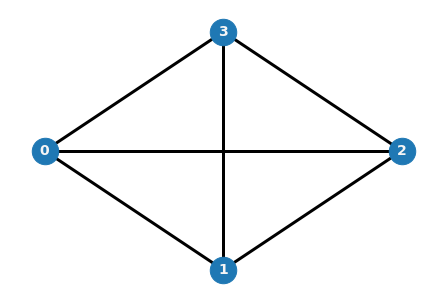

In [4]:
G = nx.Graph()
G.add_weighted_edges_from(
    {(0, 1, 0.1), (0, 2, 0.5), (0, 3, 0.1), (1, 2, 0.1), (1, 3, 0.5), (2, 3, 0.1)}
)
graph_viz(G)

# Built-in Function

In [5]:
%%time
sampler = SimulatedAnnealingSampler()

path = dnx.traveling_salesperson(G, sampler, start=0)
print(path)

[0, 1, 2, 3]
CPU times: user 6.66 ms, sys: 3.89 ms, total: 10.5 ms
Wall time: 211 ms


# Visualization

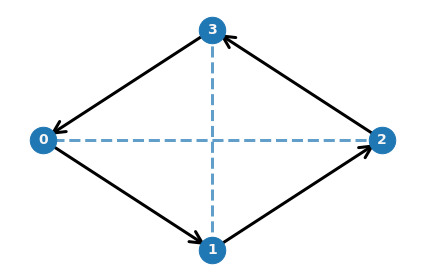

In [7]:
tsp_viz(G, path)

# Problem Graph 2

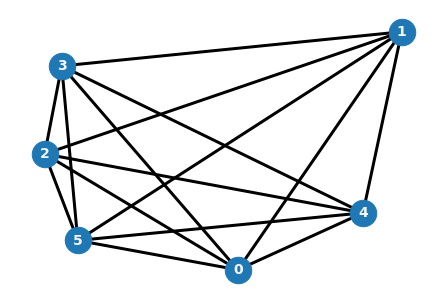

In [40]:
np.random.seed(45)
G1 = nx.complete_graph(6)
for u, v in G1.edges():
    G1[u][v]["weight"] = np.random.randint(1, 5)

graph_viz(G1)

In [11]:
list(G1.edges.data())

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 4}),
 (0, 4, {'weight': 1}),
 (0, 5, {'weight': 1}),
 (1, 2, {'weight': 4}),
 (1, 3, {'weight': 2}),
 (1, 4, {'weight': 2}),
 (1, 5, {'weight': 4}),
 (2, 3, {'weight': 1}),
 (2, 4, {'weight': 2}),
 (2, 5, {'weight': 1}),
 (3, 4, {'weight': 4}),
 (3, 5, {'weight': 2}),
 (4, 5, {'weight': 3})]

# Built-in Function

In [12]:
%%time
sampler = SimulatedAnnealingSampler()

path = dnx.traveling_salesperson(G1, sampler, start=0)
print(path)

[0, 4, 1, 3, 5, 2]
CPU times: user 131 ms, sys: 548 µs, total: 131 ms
Wall time: 221 ms


# Visualization

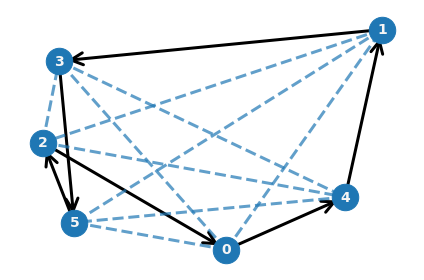

In [13]:
tsp_viz(G1, path)

# Problem Graph 3

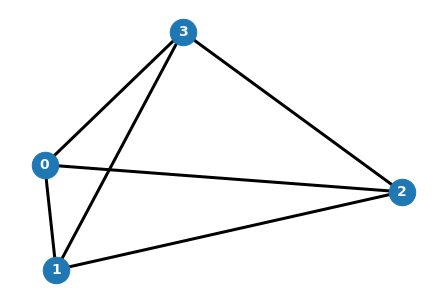

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from({(0, 1, 1), (0, 2, 5), (0, 3, 2), (1, 2, 4), (1, 3, 5), (2, 3, 3)})
graph_viz(G)

# Formulating BQM from Scratch

## Step - 1: Define an empty BQM and add the objective function

### Objective

Minimize the total distance travelled.

$
\min \quad \sum_{(i,j) \in E} w_{ij} \sum_{p=1}^{N} x_{i,p} x_{j,p+1}
$

In [ ]:
# Enter your code here





In [ ]:
bqm = dimod.BinaryQuadraticModel("BINARY")

num_cities = len(G.nodes)
for i, j in itertools.combinations(G.nodes, 2):
    for cur_pos in range(num_cities):
        next_pos = (cur_pos + 1) % num_cities
        # From city i to city j
        bqm.add_quadratic(f"x_{i}_{cur_pos}", f"x_{j}_{next_pos}", G[i][j]["weight"])
        # From city j to city i
        bqm.add_quadratic(f"x_{j}_{cur_pos}", f"x_{i}_{next_pos}", G[j][i]["weight"])

## Step - 2: Add the Constraints to the BQM

### Constraint 1

Only one city should be visited at a time.

$
\sum_{i=1}^{N} x_{i, p} = 1 \quad \forall p
$

## Task 1

Add the first constraint to the BQM.

In [22]:
# Enter your code here





In [ ]:
l1 = 5
for p in range(num_cities):
    c1 = [(f"x_{i}_{p}", 1) for i in G.nodes]
    bqm.add_linear_equality_constraint(c1, constant=-1, lagrange_multiplier=l1)

### Constraint 2

Each city should be visited one and only once.

$
\sum_{p=1}^{N} x_{i, p} = 1 \quad \forall i
$

## Task 2

Add the second constraint to the BQM.

In [24]:
# Enter your code here





In [ ]:
l2 = 5
for i in G.nodes:
    c2 = [(f"x_{i}_{p}", 1) for p in range(num_cities)]
    bqm.add_linear_equality_constraint(c2, constant=-1, lagrange_multiplier=l2)

### Constraint 3

## Task 3

Add the third constraint to the BQM.

In [25]:
# Enter your code here





## Step - 3: Solve the BQM using `SimulatedAnnealingSampler`

In [ ]:
# Enter your code here






In [ ]:
sampler = SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=1_000)
print(sampleset.truncate(10))

  x_0_0 x_0_1 x_0_2 x_0_3 x_1_0 x_1_1 x_1_2 x_1_3 ... x_3_3 energy num_oc.
0     0     0     1     0     0     0     0     1 ...     0   10.0       1
1     0     0     1     0     0     0     0     1 ...     0   10.0       1
2     0     0     1     0     0     1     0     0 ...     1   10.0       1
3     1     0     0     0     0     0     0     1 ...     0   10.0       1
4     0     1     0     0     0     0     1     0 ...     0   10.0       1
5     0     1     0     0     1     0     0     0 ...     0   10.0       1
6     1     0     0     0     0     1     0     0 ...     1   10.0       1
7     0     0     1     0     0     1     0     0 ...     1   10.0       1
8     0     1     0     0     0     0     1     0 ...     0   10.0       1
9     1     0     0     0     0     1     0     0 ...     1   10.0       1
['BINARY', 10 rows, 10 samples, 16 variables]


## Step - 4: Interpret and check the feasibility of the samples in the sampleset and find the optimum sample

## Task 4

Code a function to interpret the sample as a path.

In [27]:
# Enter your code here





In [ ]:
def find_path(G, sample):
    num_cities = len(G.nodes)
    path = defaultdict(list)
    for i in G.nodes:
        for p in range(num_cities):
            if sample[f"x_{i}_{p}"] == 1:
                path[p].append(i)
    return path

In [ ]:
first_sample = sampleset.first.sample
path = find_path(G, first_sample)
path

defaultdict(list, {0: [2], 1: [3], 3: [1], 2: [0]})

## Task 5

Code a function to verify if a given path is a feasible path or not.

In [15]:
# Enter your code here





In [ ]:
def feasible_path(G, path):
    # Only one city should be visited at a time
    for pos, city in path.items():
        if len(city) != 1:
            return False

    # All the cities should be visited one and only once
    # if len(path) != len(G.nodes):
    #     return False

    return True

In [ ]:
feasible_path(G, path)

True

## Step - 5: Visualize the Output

In [ ]:
def find_best_soln(G, sampleset):
    for sample, energy in sampleset.data(fields=["sample", "energy"]):
        path = find_path(G, first_sample)
        if feasible_path(G, path):
            sorted_path = [city for (pos, [city]) in sorted(path.items())]
            return energy, sorted_path

In [ ]:
lowest_energy, best_path = find_best_soln(G, sampleset)

print(f"Best Solution:")
print(f"--------------")
print(f"Energy = {lowest_energy}")
print(f"Path = {best_path}")

Best Solution:
--------------
Energy = 10.0
Path = [2, 3, 0, 1]


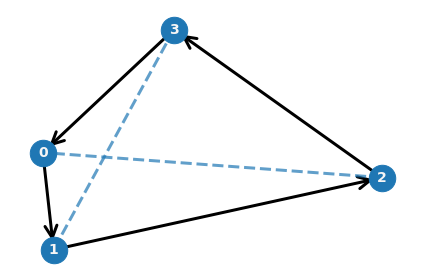

In [ ]:
tsp_viz(G, best_path)